In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
from tqdm import tqdm

root_dir = "../"
sys.path.append(root_dir)
from dataset import RSNADataset

data_dir = os.path.join(root_dir, "data")
rsna_dir = os.path.join(data_dir, "RSNA")

sns.set_theme()
sns.set_context("paper")

In [2]:
dataset = RSNADataset(
    data_dir=rsna_dir,
    op="train",
    augment=False,
    weak_supervision=True,
)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=4)

hem_length = []
for data in tqdm(dataloader):
    series, target, labels = data
    hem_length.append(torch.sum(labels).item())

100%|██████████| 17388/17388 [25:50<00:00, 11.22it/s]


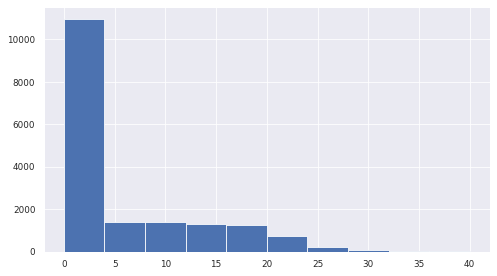

In [3]:
_, ax = plt.subplots(figsize=(16/2, 9/2))
ax.hist(hem_length)
plt.show()